## IMPORTS


In [0]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

In [0]:
# 'acousticness', 'danceability',
#  'energy', 'instrumentalness', 'key', 'liveness',
# 'loudness', , 'speechiness', 'tempo', 'time_signature'

In [0]:
d = {'Danceability': [0.2904, 0.4540, 0.322200, 0.46700], 'Energy': [0.9340, 0.91300, 0.89700, 0.65200], 
     'Instrumentalness': [0.8780, 0.86100, 0.9000, 0.89300], 'Liveness': [0.1110, 0.13500, 0.14500, 0.00250],
     'Valence': [0.8890, 0.8220, 0.58900, 0.95600]}

df = pd.DataFrame(data=d)


In [68]:
df

,Danceability,Energy,Instrumentalness,Liveness,Valence
0,0.2904,0.934,0.878,0.1110,0.889
1,0.4540,0.913,0.861,0.1350,0.822
2,0.3222,0.897,0.900,0.1450,0.589
3,0.4670,0.652,0.893,0.0025,0.956


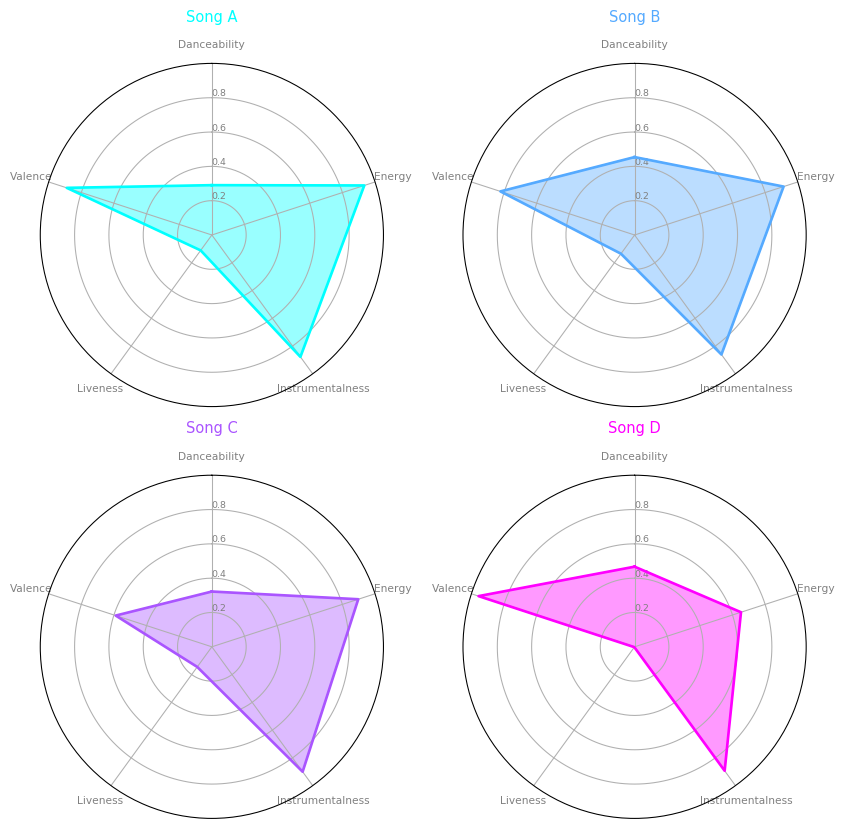

In [86]:

# Set data
df = pd.DataFrame({'group': ['A','B','C','D'], 'Danceability': [0.2904, 0.4540, 0.322200, 0.46700], 'Energy': [0.9340, 0.91300, 0.89700, 0.65200], 
     'Instrumentalness': [0.8780, 0.86100, 0.9000, 0.89300], 'Liveness': [0.1110, 0.13500, 0.14500, 0.00250],
     'Valence': [0.8890, 0.8220, 0.58900, 0.95600]})
 
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):
 
# number of variable
  categories=list(df)[1:]
  N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
  angles = [n / float(N) * 2 * pi for n in range(N)]
  angles += angles[:1]
 
# Initialise the spider plot
  ax = plt.subplot(2,2,row+1, polar=True, )
 
# If you want the first axis to be on top:
  ax.set_theta_offset(pi / 2)
  ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
  plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
  ax.set_rlabel_position(0)
  plt.yticks([0.2,0.4,0.6,0.8], ["0.2","0.4","0.6","0.8"], color="grey", size=7)
  plt.ylim(0,1)
 
# Ind1
  values=df.loc[row].drop('group').values.flatten().tolist()
  values += values[:1]
  ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
  ax.fill(angles, values, color=color, alpha=0.4)
 
# Add a title
  plt.title(title, size=11, color=color, y=1.1)
 
# ------- PART 2: Apply to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("cool", len(df.index))
 
# Loop to plot
for row in range(0, len(df.index)):
  make_spider( row=row, title='Song '+df['group'][row], color=my_palette(row))

plt.savefig('songcomparison.png')



In [77]:
df


,group,var1,var2,var3,var4,var5
0,A,38.0,29,8,7,28
1,B,1.5,10,39,31,15
2,C,30.0,9,23,33,32
3,D,4.0,34,24,14,14
